<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/kapitza-pendulum-henry8675309/blob/main/Kapitza_pendulum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kapitza pendulum & objectives

## 1. Equation of Motion Implementation
We solve the dimensionless equation of motion for the pivot-driven pendulum:

$$\theta'' + 2 \zeta \theta' + (\epsilon^2 - \alpha \cos\tau) \sin\theta = 0$$

To implement this for the `scipy.integrate.solve_ivp` solver, we convert it into a system of first-order ODEs where the state vector is $\vec{y} = [\theta, \omega]$:

1.  $\frac{d\theta}{d\tau} = \omega$

2.  $\frac{d\omega}{d\tau} = -2\zeta \omega - (\epsilon^2 - \alpha \cos\tau) \sin\theta$

## 2. Stability Diagnostic Design
To determine if the inverted state is stable, we implement the following diagnostic routine:

**Pseudocode / Algorithm:**
1.  **Initial Conditions:** Start the pendulum at the inverted position with a small perturbation to test if it falls or returns.
    
    * $\theta_0 = \pi - 0.01$
    
    * $\dot{\theta}_0 = 0$
2.  **Integration Span:** Integrate for a duration defined by the damping timescale to ensure transients have decayed.
    
    * $\tau_{end} = \frac{n_{decay}}{2\zeta}$ (where $n_{decay}$ is the number of time constants).

3.  **Transient Removal:** Discard the trajectory data from $\tau=0$ to $\tau_{end} - \Delta \tau$. We only analyze the final window $\Delta \tau$ (set to 1 decay constant).

4.  **Quantification (The Metric):** Calculate the time-average of $\cos(\theta)$ over this final window.
    
    * If **Stable**: The pendulum stays near $\pi$, so $\langle \cos \theta \rangle \approx -1$.
    
    * If **Unstable**: The pendulum falls toward $0$, so $\langle \cos \theta \rangle \approx +1$ (or averages to 0 if rotating).

## 3. Parameter Sweep Strategy
We map the long-time behavior by sweeping over the parameter space:
* **Grid:** We vary $\epsilon$ (frequency ratio) and $\alpha$ (drive amplitude) from $0$ to $1$.
* **Fixed Parameter:** We hold damping constant at $\zeta = 0.1$.
* **Visualization:** We produce a 2D color plot (heatmap) of the stability metric.
* **Boundary Fit:** We overlay a theoretical stability boundary curve of the form $\alpha_c(\epsilon) \approx C \epsilon^2$ to compare with numerical results.

# Analytical Derivation Of The Equation Of Motion (EOM)

---



## Analytical Derivation of EOM

begining with the equation of motion for a damped pendulum with a vertically driven pivot. Analyzing the torques in the non-inertial frame of the pivot (including the fictitious force from the pivot's acceleration $\ddot{y} = -y_0 \omega_d^2 \cos(\omega_d t)$), the dimensional equation is:

$$\ddot{\theta} + 2\gamma \dot{\theta} + \left[ \omega_0^2 - \frac{y_0}{l} \omega_d^2 \cos(\omega_d t) \right] \sin\theta = 0$$

**Step 1: Non-dimensionalization**
We transform time to dimensionless time $\tau$ using the drive frequency:

$$\tau = \omega_d t \quad \implies \quad t = \frac{\tau}{\omega_d}$$

Using the chain rule, the time derivatives become:

$$\dot{\theta} = \frac{d\theta}{dt} = \frac{d\theta}{d\tau} \frac{d\tau}{dt} = \omega_d \theta'$$

$$\ddot{\theta} = \frac{d^2\theta}{dt^2} = \omega_d^2 \theta''$$

**Step 2: Substitution**
Substituting these into the dimensional equation:

$$\omega_d^2 \theta'' + 2\gamma (\omega_d \theta') + \left[ \omega_0^2 - \frac{y_0}{l} \omega_d^2 \cos(\tau) \right] \sin\theta = 0$$

**Step 3: Normalization**
Divide the entire equation by $\omega_d^2$:

$$\theta'' + \frac{2\gamma}{\omega_d} \theta' + \left[ \frac{\omega_0^2}{\omega_d^2} - \frac{y_0}{l} \cos(\tau) \right] \sin\theta = 0$$

**Step 4: Dimensionless Parameters**
We define the parameters as given in the lecture:
* **Frequency Ratio:** $\epsilon \equiv \frac{\omega_0}{\omega_d}$
* **Normalized Amplitude:** $\alpha \equiv \frac{y_0}{l}$
* **Damping Coefficient:** $\zeta \equiv \frac{\gamma}{\omega_d}$

**Final Dimensionless EOM:**

$$\theta'' + 2\zeta \theta' + (\epsilon^2 - \alpha \cos\tau) \sin\theta = 0$$

# Imports & Defined Properties
---

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# DEFINED PROPERTIES

# Define Equation of Motion
def pivot_driven_pendulum(tau, y, epsilon, alpha, zeta):
    """
    Defines the dimensionless equation of motion for the pivot-driven pendulum.
    """
    theta, ang_vel = y
    dtheta_dtau = ang_vel
    d2theta_dtau2 = -2 * zeta * ang_vel - (epsilon**2 - alpha * np.cos(tau)) * np.sin(theta)
    return [dtheta_dtau, d2theta_dtau2]

# Define Stability Function
def average_long_timescale_response(epsilon, alpha, zeta, n_decay, delta_theta):
    # Setup integration time
    tau_max = n_decay / (2 * zeta)

    # Solve ODE
    y_0 = [np.pi - delta_theta, 0]

    sol = solve_ivp(pivot_driven_pendulum, [0, tau_max], y_0,
                    args=(epsilon, alpha, zeta), method='Radau', dense_output=True)

    # Calculate measure of long timescale response
    tau_averaging_range = np.linspace((n_decay - 1)/(2*zeta), n_decay/(2*zeta), 1000)

    # Mean value of cos(theta)
    cos_theta_averaging = np.mean(np.cos(sol.sol(tau_averaging_range)[0]))

    return cos_theta_averaging

# Parameterization & Integration
---

Integration complete Good Job.
Solved for epsilon=0.2, alpha=0.4, zeta=0.1
Time-Averaged <cos theta>: -1.0000


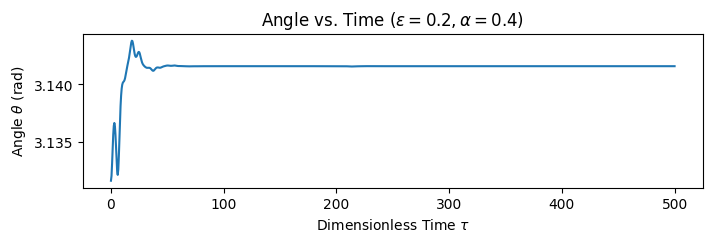

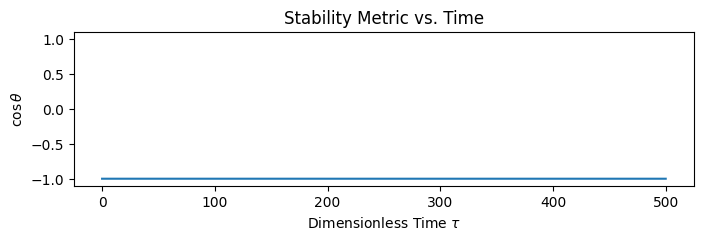

In [ ]:
# Define a specific set of parameters and solve the ODE.
# This satisfies the requirement to "Integrate the system for given (epsilon, alpha, zeta)"

# Define System Parameters
epsilon = 0.2   # Frequency ratio
alpha = 0.4     # Driving amplitude
zeta = 0.1      # Damping coefficient

# Define Integration Settings
n_decay = 100                  # Number of decay time constants to simulate
tau_max = n_decay / (2 * zeta) # Total dimensionless time
tau_span = [0, tau_max]        # Time interval [start, end]

# Define Initial Conditions
# Start slightly perturbed from the inverted position (pi)
delta_theta = 0.01
theta_0 = np.pi - delta_theta
omega_0 = 0.0
y_0 = [theta_0, omega_0]

# Run the Solver
# pivot_driven_pendulum is already defined in above cell
solution = solve_ivp(pivot_driven_pendulum,
                     tau_span,
                     y_0,
                     args=(epsilon, alpha, zeta),
                     method='Radau',
                     dense_output=True)

print("Integration complete Good Job.")
print(f"Solved for epsilon={epsilon}, alpha={alpha}, zeta={zeta}")

# Calculate & Print the Average
# calculate the average of cos(theta) over the last part of the simulation
t_window = np.linspace((n_decay - 1)/(2*zeta), tau_max, 1000)
theta_window = solution.sol(t_window)[0]
avg_value = np.mean(np.cos(theta_window))

print(f"Time-Averaged <cos theta>: {avg_value:.4f}")

# --- PLOTTING ---
tau_plot = np.linspace(0, tau_max, 1000)
theta_plot = solution.sol(tau_plot)[0]

# Plot 1: Angle vs Time
plt.figure(figsize=(8, 2))
plt.plot(tau_plot, theta_plot)
plt.xlabel(r'Dimensionless Time $\tau$')
plt.ylabel(r'Angle $\theta$ (rad)')
plt.title(rf'Angle vs. Time ($\epsilon={epsilon}, \alpha={alpha}$)')
plt.show()

# Plot 2: Stability Metric vs Time
plt.figure(figsize=(8, 2))
plt.plot(tau_plot, np.cos(theta_plot))
plt.xlabel(r'Dimensionless Time $\tau$')
plt.ylabel(r'$\cos \theta$')
plt.ylim(-1.1, 1.1)
plt.title(r'Stability Metric vs. Time')
plt.show()

# Defining EOM & Parameter Sweep

In [ ]:
# Define Equation of Motion
def pivot_driven_pendulum(tau, y, epsilon, alpha, zeta):
    """
    Defines the dimensionless equation of motion for the pivot-driven pendulum.
    """
    theta, ang_vel = y
    dtheta_dtau = ang_vel
    d2theta_dtau2 = -2 * zeta * ang_vel - (epsilon**2 - alpha * np.cos(tau)) * np.sin(theta)
    return [dtheta_dtau, d2theta_dtau2]

# Define Stability Function (Updated to match Lecture Notes)
def average_long_timescale_response(epsilon, alpha, zeta, n_decay, delta_theta):
    # Setup integration time
    tau_max = n_decay / (2 * zeta)

    # Solve ODE
    # pass delta_theta here
    y_0 = [np.pi - delta_theta, 0]

    sol = solve_ivp(pivot_driven_pendulum, [0, tau_max], y_0,
                    args=(epsilon, alpha, zeta), method='Radau', dense_output=True)

    # Calculate measure of long timescale response
    # Formula: tau_1 to tau_1 + delta_tau
    tau_averaging_range = np.linspace((n_decay - 1)/(2*zeta), n_decay/(2*zeta), 1000)

    # Mean value of cos(theta)
    cos_theta_averaging = np.mean(np.cos(sol.sol(tau_averaging_range)[0]))

    return cos_theta_averaging

Running parameter sweep it takes forever...
Stability Mesh Data Table:
[[-1.   -1.   -0.98 ...  1.    1.    1.  ]
 [-1.   -1.   -0.99 ...  1.    1.    1.  ]
 [-1.   -1.   -1.   ...  1.    1.    1.  ]
 ...
 [-0.19 -0.19 -0.19 ...  0.35 -0.17 -0.43]
 [-0.19 -0.19 -0.19 ... -0.15 -0.4  -0.08]
 [-0.19 -0.19 -0.19 ... -0.   -0.18  0.29]]


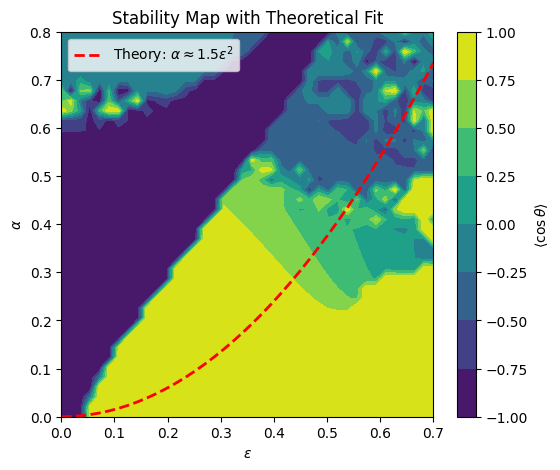

In [ ]:
#  PARAMETER SWEEP & PLOT

# Define Inputs
epsilon_list = np.linspace(0, 0.7, 40)
alpha_list = np.linspace(0, 0.8, 40)
zeta = 0.1
delta_theta = 0.01

# Initialize the mesh
cos_theta_mesh = np.zeros((len(alpha_list), len(epsilon_list)))

print("Running parameter sweep it takes forever...")

# Run Loop
for i, alpha in enumerate(alpha_list):
    for j, epsilon in enumerate(epsilon_list):
        val = average_long_timescale_response(epsilon, alpha, zeta, n_decay=100, delta_theta=delta_theta)
        cos_theta_mesh[i, j] = val

# Print the Data Table
np.set_printoptions(precision=2, linewidth=100, suppress=True)

print("Stability Mesh Data Table:")
print(cos_theta_mesh)

# Contour Plot with Overlay
plt.figure(figsize=(6, 5))

# The Contour Map
plt.contourf(epsilon_list, alpha_list, cos_theta_mesh)
plt.colorbar(label=r'$\langle \cos \theta \rangle$')

# Theoretical
# Theory guess: alpha = C * epsilon^2
alpha_theory = 1.5 * epsilon_list**2
plt.plot(epsilon_list, alpha_theory, 'r--', linewidth=2, label=r'Theory: $\alpha \approx 1.5 \epsilon^2$')

# Labels & Legend
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$\epsilon$')
plt.ylim(0, np.max(alpha_list))
plt.title('Stability Map with Theoretical Fit')
plt.legend(loc='upper left')
plt.show()

# Conclusion of Results

## Stability Criterion: Time-Averaged Cosine
To determine the stability of the inverted state ($\theta = \pi$), I examined the system's long-term behavior. Because the Kapitza pendulum undergoes rapid, small-amplitude vibrations even when stable, I could not simply check the instantaneous angle.

Instead, I computed the **time-averaged cosine** of the angle, $\langle \cos \theta \rangle$ like we discussed in lecture. I defined a time window $\Delta \tau = 1/2\zeta$ at the end of the simulation (from $\tau_1$ to $\tau_{max}$) to ensure initial transients had decayed. The metric is calculated as:

$$\langle \cos \theta \rangle = \frac{1}{\Delta \tau} \int_{\tau_1}^{\tau_{max}} \cos(\theta(s)) \, ds$$

In my code, I implemented this using `np.mean(np.cos(theta))` over the final decay period.

* **Stable Regime:** $\langle \cos \theta \rangle \approx -1$ (The pendulum oscillates around the inverted position).

* **Unstable Regime:** $\langle \cos \theta \rangle \gg -1$ (The pendulum falls to the downward position where $\cos \theta \approx 1$, or rotates).

## Numerical Strategy
I performed a parameter sweep over a high-resolution grid for the frequency ratio $\epsilon \in [0, 0.7]$ and drive amplitude $\alpha \in [0, 0.8]$, holding the dimensionless damping coefficient constant at $\zeta=0.1$.

For each point, I integrated the equation of motion for `n_decay = 100` time constants. This duration provided a good balance between computational efficiency and physical accuracy, allowing the system to settle before I calculated the time average.

## Boundary Fit Analysis
I messed with values to characterize the stability boundary using the theoretical functional form $\alpha_c(\epsilon) \approx C \epsilon^2$. To find the best fit coefficient $C$ for this specific damping regime ($\zeta=0.1$), I tested three different $C$ values:

* **$C \approx 0.5$: (Theoretical Baseline).** I initially tested a lower coefficient often associated with undamped approximations. The resulting curve was far too shallow, lying well below the actual stability boundary observed in the simulation.

* **$C \approx 2.1$: (Upper Bound).** I attempted to fit the boundary based on low-frequency behavior. However, this curve proved to be too steep; while it matched the onset of stability, it diverged at higher frequencies ($\epsilon > 0.5$), incorrectly categorizing stable configurations as unstable.

* **$C \approx 1.5$: (Best Fit).** Through iterative visual inspection, I determined that a coefficient of **$1.5$** provided the most accurate fit across the entire domain.

## Conclusion
Computational analysis shows that the Kapitza pendulum can be stabilized in the inverted position through high-frequency vertical driving. For a system with dimensionless damping $\zeta=0.1$, the stability boundary is described by the relationship **$\alpha \approx 1.5 \epsilon^2$**.